# Image Channels

**Task: Selecting an area of interest using Color Threshold: Turn Blue screen i.e. background and replace it with new image of your choice.**

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

- Reading an Image using OpenCV
- Finding Dimensions of the image
- Plotting the image (OpenCV reads the image as BGR, the image is RGB)

(900, 1440, 3)


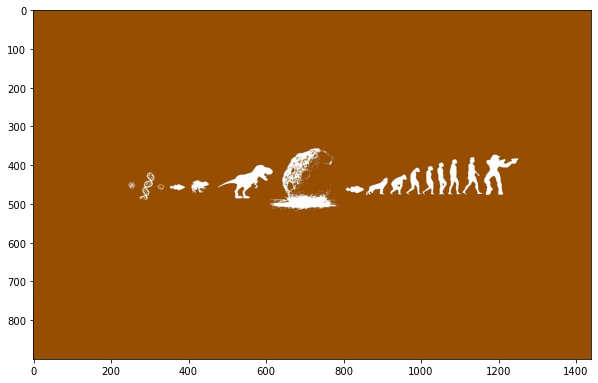

In [2]:
image = cv2.imread("../Images/evolution.jpg")
# Shape of image
print(image.shape)
plt.figure(figsize=(10, 12))
plt.imshow(image)

- First, creating a copy of an image.
- Convert BGR into RGB

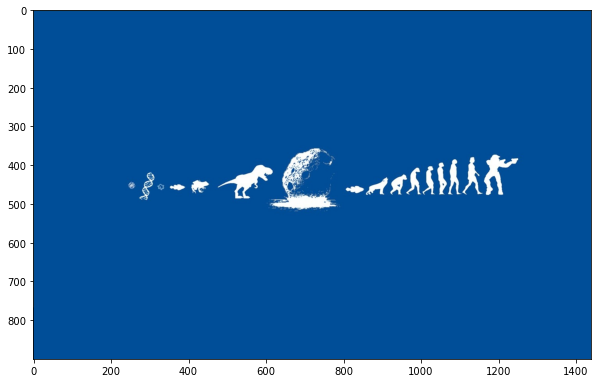

In [3]:
image_copy = np.copy(image)
image_rgb = cv2.cvtColor(image_copy,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 12))
plt.imshow(image_rgb)

- Creating threshold to separate the blue background and image objects.
- Threshold will help in creating a mask for those image objects.

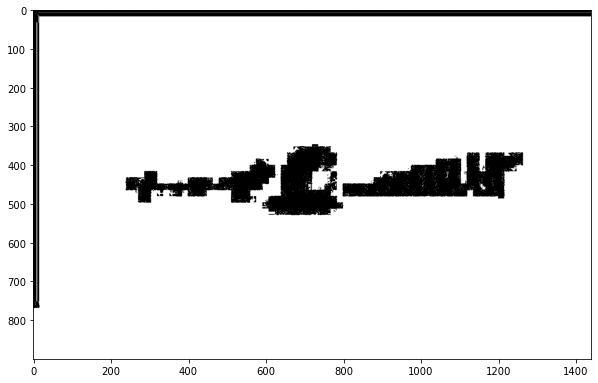

In [4]:
l_val = np.array([0,78,151])
h_val = np.array([10,78,152])
mask = cv2.inRange(image_rgb,l_val,h_val)
plt.figure(figsize=(10, 12))
plt.imshow(mask,cmap='gray')

- Turning the mask into dark background, in a sense nullifying the blue color.

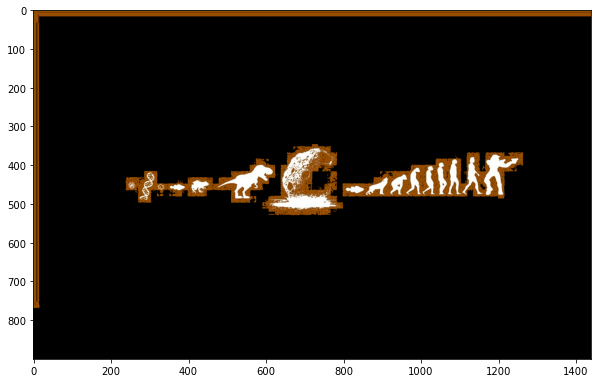

In [5]:
masked_image = np.copy(image_copy)
masked_image[mask !=0] = [0,0,0]
plt.figure(figsize=(10, 12))
plt.imshow(masked_image)

- Reading a new image.
- New Image will act as background for the previous image.
- New Image is resized to previous image size.

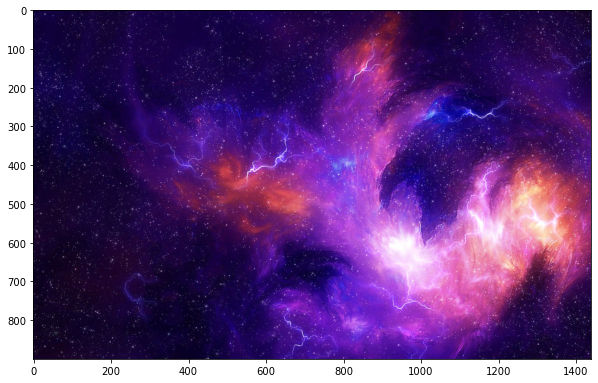

In [6]:
bgi = cv2.imread("../Images/space.jpg")
bgi_rgb = cv2.cvtColor(bgi,cv2.COLOR_BGR2RGB)
bgi_crop = bgi_rgb[0:900,0:1440]
plt.figure(figsize=(10, 12))
plt.imshow(bgi_crop)

- Creating a masked region on new image w.r.t previous image mask.

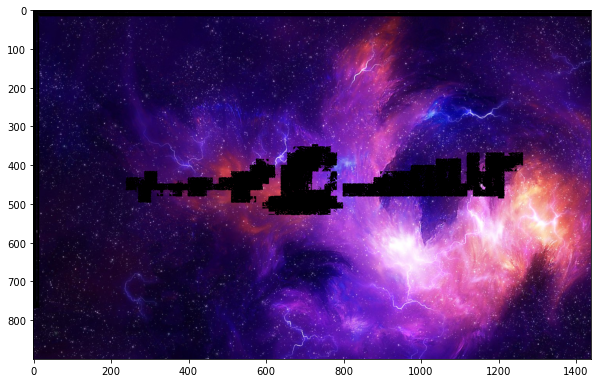

In [7]:
bgi_crop[mask == 0] = [0,0,0]
plt.figure(figsize=(10, 12))
plt.imshow(bgi_crop)

- Replace the masked region in new image with previous image object.

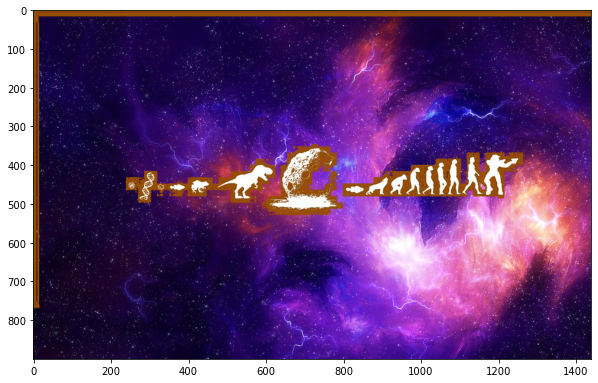

In [8]:
face_space = masked_image + bgi_crop
plt.figure(figsize=(10, 12))
plt.imshow(face_space)

### Color Detection Using HSV

Consider a bunch of colored balls and our task is to count number of red balls from the bunch.

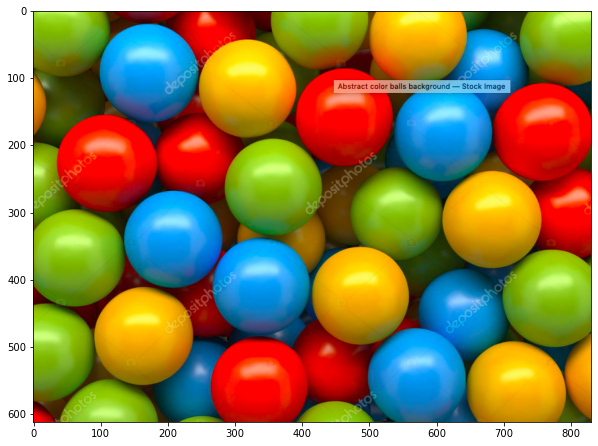

In [20]:
color_balls = cv2.imread("../Images/Color_balls.png")
color_ball = cv2.cvtColor(color_balls,cv2.COLOR_BGR2RGB)
image_copy = np.copy(color_ball)
plt.figure(figsize=(10, 12))
plt.imshow(image_copy)

### Red Channel

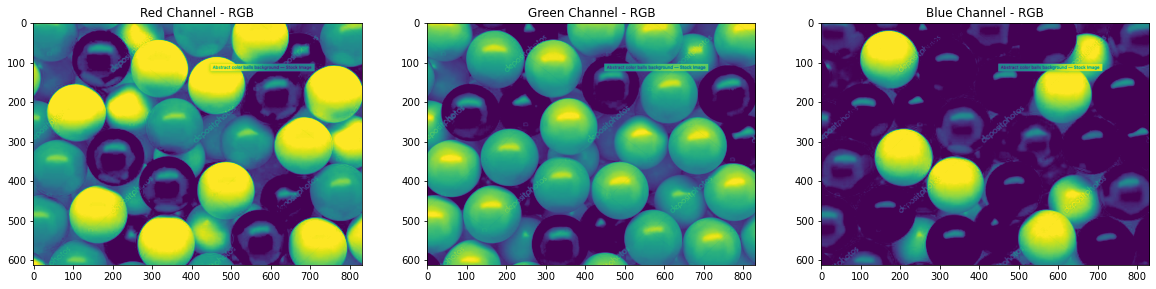

In [33]:
red_ = image_copy[:,:,0]
green_ = image_copy[:,:,1]
blue_ = image_copy[:,:,2]

f, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(20,10))

ax1.set_title("Red Channel - RGB")
ax1.imshow(red_)

ax2.set_title("Green Channel - RGB")
ax2.imshow(green_)

ax3.set_title("Blue Channel - RGB")
ax3.imshow(blue_)

- **Convert from RGB to HSV, the value channel of HSV is highly affected by lightning conditions and it also helps in changing the brightness of the image.**

### Plotting HSV channels

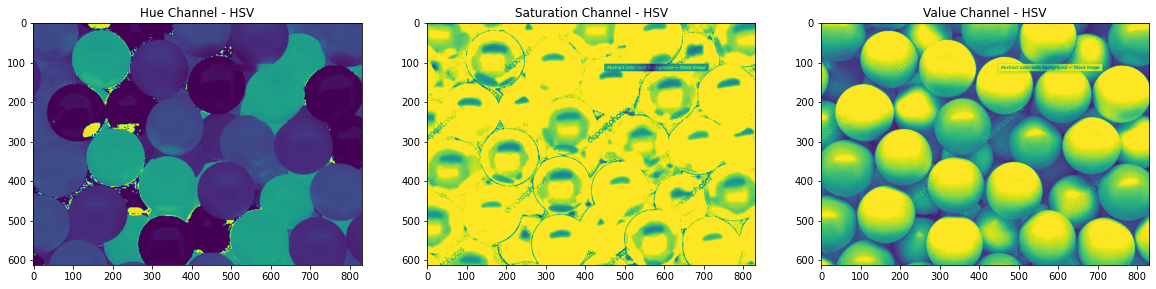

In [31]:
color_ball_hsv = cv2.cvtColor(image_copy,cv2.COLOR_RGB2HSV)
hue_ = color_ball_hsv[:,:,0]
saturation_ = color_ball_hsv[:,:,1]
value_ = color_ball_hsv[:,:,2]

f, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(20,10))

ax1.set_title("Hue Channel - HSV")
ax1.imshow(hue_)

ax2.set_title("Saturation Channel - HSV")
ax2.imshow(saturation_)

ax3.set_title("Value Channel - HSV")
ax3.imshow(value_)

- Creating mask to separate out red from other balls.

In [16]:
l_red = np.array([30,0,0])
h_red = np.array([255,160,120])
image_rgb = np.copy(image_copy)

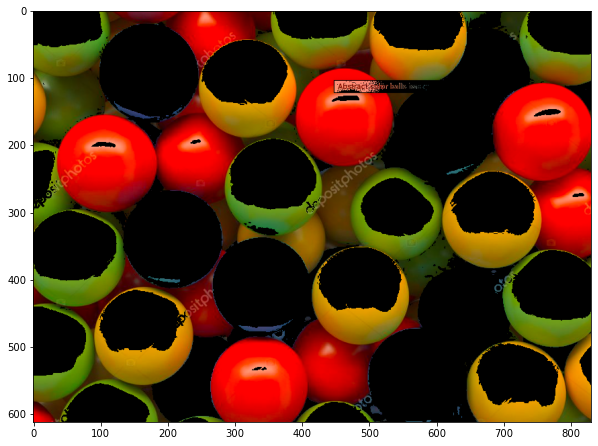

In [27]:
red_balls_mask = cv2.inRange(image_rgb,l_red,h_red)
masked_image = np.copy(image_rgb)
masked_image[red_balls_mask==0] = [0,0,0]
plt.figure(figsize=(10, 12))
plt.imshow(masked_image)

- Clear distinction between the color red and others
- Clear distinction between the color red and others in RGB format

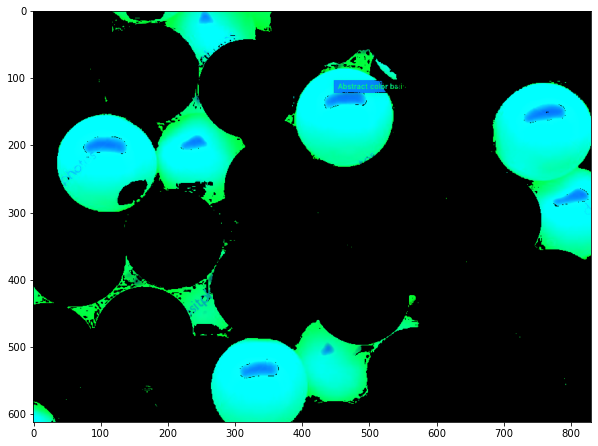

In [28]:
l_red_hsv = np.array([0,118,0])
h_red_hsv = np.array([9,255,255])
red_balls_mask = cv2.inRange(color_ball_hsv,l_red_hsv,h_red_hsv)
masked_image = np.copy(color_ball_hsv)
masked_image[red_balls_mask==0] = [0,0,0]
plt.figure(figsize=(10, 12))
plt.imshow(masked_image)

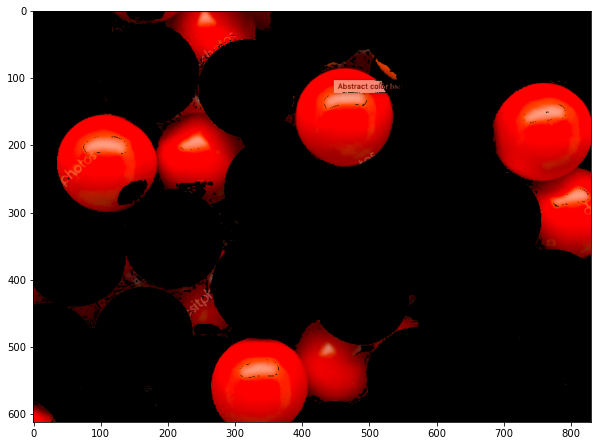

In [29]:
red = cv2.cvtColor(masked_image,cv2.COLOR_HSV2RGB)
plt.figure(figsize=(10, 12))
plt.imshow(red)

### Task for learners, write a program to count these Red balls.